In [4]:
import numpy as np
import pandas as pd
import cv2 as cv
import glob as gb
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from skimage import io

In [7]:
c = 0
x_train = []
y_train = []
class_o = ['Car', 'Cat', 'Dog', 'Flower']
DIR = r'C:\\Users\\Salah\\Desktop\\BDL\\instagram scraper and train cnn\\data_train'
for o in class_o:
    path = os.path.join(DIR,o)
    lab  = class_o.index(o)    
    files =gb.glob(pathname=(path +'/*.jpg'))
    #print(files)
    for file in files:
        im = cv.imread(file)
        image  = cv.resize(im,(64,64))
        x_train.append(image)
        y_train.append(lab)
        c+=1
    
cv.destroyAllWindows()
print(c)

4000


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.15)

In [14]:
X_train=np.array(X_train)
X_train.shape

(3400, 64, 64, 3)

In [15]:
Y_train=np.array(Y_train)
Y_train.shape

(3400,)

In [16]:
Y_test=np.array(Y_test)
Y_test.shape

(600,)

Text(0.5, 0, 'Flower')

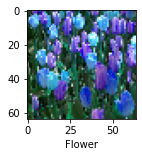

In [44]:
x = 15
plt.figure(figsize = (15,2))
plt.imshow(X_train[x])
plt.xlabel(class_o[Y_train[x]])

In [18]:
X_train = X_train / 255.0


In [19]:
X_test=np.array(X_test)
X_test.shape

(600, 64, 64, 3)

In [20]:
X_test = X_test/ 255.0

In [24]:
cnn = models.Sequential([
                  layers.Conv2D(32, (2,2), activation='relu', input_shape=(64, 64, 3)),
                  layers.MaxPooling2D(3,3),
                  layers.Conv2D(64, kernel_size=(3,3),activation='relu',kernel_initializer='he_normal'),
                  layers.MaxPooling2D(2,2),
                  #layers.Conv2D(64, (2, 2), activation='relu'),
                  layers.Conv2D(64, kernel_size=(2,2),activation='relu',kernel_initializer='he_normal'),
                  layers.MaxPooling2D(2,2),
                  layers.Flatten(),
                  layers.Dense(128,activation='relu'),
                  layers.Dense(4,activation='softmax',kernel_initializer='glorot_normal')
                  
])

In [25]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
107/107 [==============================] - 5s 39ms/step - loss: 0.9778 - accuracy: 0.5659
Epoch 2/10
107/107 [==============================] - 4s 39ms/step - loss: 0.6830 - accuracy: 0.6929
Epoch 3/10
107/107 [==============================] - 4s 38ms/step - loss: 0.6007 - accuracy: 0.7335
Epoch 4/10
107/107 [==============================] - 4s 38ms/step - loss: 0.5401 - accuracy: 0.7591
Epoch 5/10
107/107 [==============================] - 4s 38ms/step - loss: 0.4876 - accuracy: 0.7882
Epoch 6/10
107/107 [==============================] - 4s 38ms/step - loss: 0.4382 - accuracy: 0.8165
Epoch 7/10
107/107 [==============================] - 4s 38ms/step - loss: 0.4138 - accuracy: 0.8244
Epoch 8/10
107/107 [==============================] - 4s 38ms/step - loss: 0.3559 - accuracy: 0.8515
Epoch 9/10
107/107 [==============================] - 4s 38ms/step - loss: 0.3628 - accuracy: 0.8532
Epoch 10/10
107/107 [==============================] - 4s 39ms/step - loss: 0.2836 - accura

In [27]:
cnn.evaluate(X_test,Y_test)

19/19 [==============================] - 0s 12ms/step - loss: 0.5788 - accuracy: 0.7900


[0.5787736773490906, 0.7900000214576721]

In [28]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 63, 63, 32)        416       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 21, 21, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 19, 19, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          16448     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)        

19/19 [==============================] - 0s 11ms/step


<AxesSubplot:>

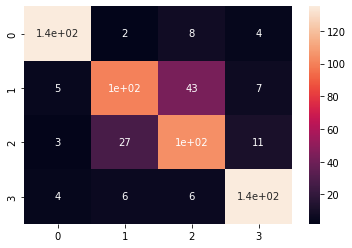

In [48]:
predictions = cnn.predict(X_test)

import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions.argmax(axis=1))
sns.heatmap(cm, annot=True)

In [49]:
model = models.Sequential([
    layers.Conv2D(32, (2,2), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu',kernel_initializer='he_normal'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (2, 2), activation='relu'),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(4,activation='softmax',kernel_initializer='glorot_normal')
    
    
    
])
#model.add()
#model.add()
#model.add()
#model.add()
#model.add()

In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
107/107 [==============================] - 7s 65ms/step - loss: 1.0005 - accuracy: 0.5526
Epoch 2/20
107/107 [==============================] - 7s 69ms/step - loss: 0.6759 - accuracy: 0.7059
Epoch 3/20
107/107 [==============================] - 7s 68ms/step - loss: 0.5703 - accuracy: 0.7488
Epoch 4/20
107/107 [==============================] - 7s 68ms/step - loss: 0.4570 - accuracy: 0.8156
Epoch 5/20
107/107 [==============================] - 7s 68ms/step - loss: 0.3687 - accuracy: 0.8521
Epoch 6/20
107/107 [==============================] - 7s 68ms/step - loss: 0.2986 - accuracy: 0.8776
Epoch 7/20
107/107 [==============================] - 8s 75ms/step - loss: 0.2412 - accuracy: 0.8994
Epoch 8/20
107/107 [==============================] - 8s 71ms/step - loss: 0.1668 - accuracy: 0.9335
Epoch 9/20
107/107 [==============================] - 8s 71ms/step - loss: 0.1188 - accuracy: 0.9591
Epoch 10/20
107/107 [==============================] - 8s 71ms/step - loss: 0.0788 - accura

In [79]:
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 2ms/step - loss: 1.0697 - accuracy: 0.7083


[1.0697439908981323, 0.7083333134651184]